In [1]:
from src.agent import AgentPPT
from src.openai import generate_image, query
from src.ppt_reader import get_shape_content
from src.utils import fromEmus, ppt_to_pdf, pdf_to_img, toEmus
from pptx import Presentation
import src.prompts as prompts
import json, os, tempfile, shutil


In [2]:
agent = AgentPPT()
r = agent.plan_module("Explain what is vlookup")
agent.save_ppt()

2025-04-03 01:05:15 - AgentPPT instance created with model: gpt-4o, src_path: src_path, dst_path: working.pptx 

2025-04-03 01:05:15 - Cleared chat history. 

2025-04-03 01:05:15 - New presentation created 

2025-04-03 01:05:15 - Calling PLAN module with prompt: Explain what is vlookup 

2025-04-03 01:05:30 - Enhanced orginal prompt:
"Create a PowerPoint presentation explaining VLOOKUP. The presentation should include the following slides:

1. **Title Slide**: Include the title 'Understanding VLOOKUP' and your name or the date.
   
2. **Introduction Slide**: Briefly explain what VLOOKUP is and its purpose in Excel.

3. **How VLOOKUP Works**: 
   - Include a detailed explanation of the VLOOKUP function syntax: `=VLOOKUP(lookup_value, table_array, col_index_num, [range_lookup])`.
   - Use bullet points to break down each component of the syntax.

4. **Example Slide**: 
   - Provide a practical example of using VLOOKUP with a sample dataset. 
   - Include a screenshot of the Excel sheet s

In [6]:
agent.save_ppt()

2025-04-03 00:41:02 - Presentation saved to working.pptx 



In [6]:
agent = AgentPPT()
agent.insert_slide()
agent.action_module("""Change the contents of the slide to the folowing.Title: Day 1 - Discover Seoul
Content:
- Morning: Visit Gyeongbokgung Palace
  - Experience the Changing of the Guard ceremony
  - Explore the National Folk Museum
- Afternoon: Stroll through Insadong
  - Enjoy traditional tea houses and shops
- Evening: N Seoul Tower
  - Panoramic views of the city
  - Dine at the revolving restaurant """, slide_idx=0)
agent.save_ppt()

2025-04-02 22:01:18 - AgentPPT instance created with model: gpt-4o, src_path: src_path, dst_path: working.pptx 

2025-04-02 22:01:18 - Cleared chat history. 

2025-04-02 22:01:18 - New presentation created 

2025-04-02 22:01:18 - Calling ACTION module on slide 0 with prompt: Change the contents of the slide to the folowing.Title: Day 1 - Discover Seoul
Content:
- Morning: Visit Gyeongbokgung Palace
  - Experience the Changing of the Guard ceremony
  - Explore the National Folk Museum
- Afternoon: Stroll through Insadong
  - Enjoy traditional tea houses and shops
- Evening: N Seoul Tower
  - Panoramic views of the city
  - Dine at the revolving restaurant  

2025-04-02 22:01:25 - API - modify_shape | Status - SUCCESS | Shape modified: {"text": "Day 1 - Discover Seoul"} | Arguments - {'shape_index': 0, 'instructions': "Change text to 'Day 1 - Discover Seoul'."}
API - modify_shape | Status - SUCCESS | Shape modified: {"text": "\nMorning: Visit Gyeongbokgung Palace\n  Experience the Changi

In [3]:
agent = AgentPPT()
agent.render()

2025-04-02 18:06:31 - AgentPPT instance created with model: gpt-4o, src_path: src_path, dst_path: working.pptx 

2025-04-02 18:06:31 - Cleared chat history. 

2025-04-02 18:06:31 - New presentation created 



[<PIL.Image.Image image mode=RGB size=800x600>]

Conversion completed: 1 files converted successfully, 0 files failed.


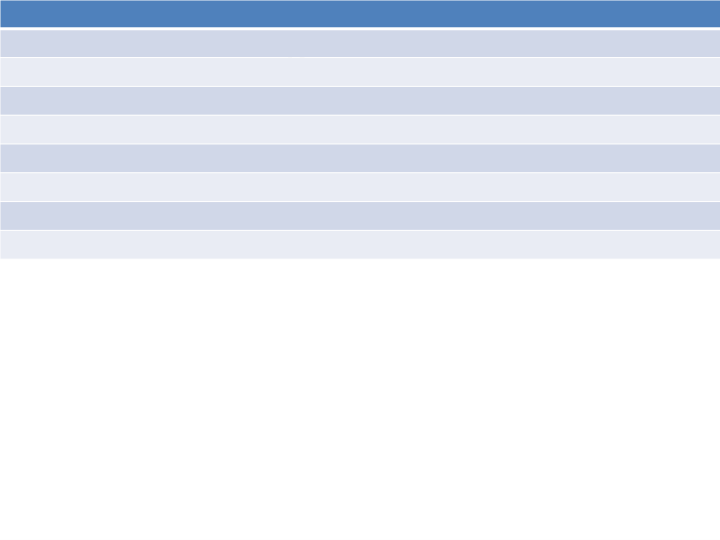

In [19]:
ppt = Presentation()
slide_layout = ppt.slide_layouts[1]
slide = ppt.slides.add_slide(slide_layout)
shape = slide.shapes[0]
shape.text = "Raccoon"
shape = slide.shapes.add_table(9, 2, 0, 0, toEmus(2*40), toEmus(3*12))
shape.table.columns[0].width = toEmus(500)
temp_dir = tempfile.mkdtemp()

temp_ppt_path = os.path.join(temp_dir, "temp_presentation.pptx")
ppt.save(temp_ppt_path)
pdf_path = ppt_to_pdf(temp_ppt_path, temp_dir)
imgs = slide_images = pdf_to_img(pdf_path)

shutil.rmtree(temp_dir)

imgs[0]

In [20]:
len(shape.)